# Assignment 2 - Question 3


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 02/Images/3a.png">
<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 02/Images/3b.png">


<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 02/Images/3c.jpeg">
<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 02/Images/3d.jpeg">


In [61]:
np.random.seed(3)

In [62]:
sensor_pos_1 = (1 / np.sqrt(2), 1 / np.sqrt(2))
sensor_pos_2 = (-1 / np.sqrt(2), 1 / np.sqrt(2))
sensor_pos_3 = (-1 / np.sqrt(2), -1 / np.sqrt(2))
sensor_pos_4 = (1 / np.sqrt(2), -1 / np.sqrt(2))
landmarks = np.array([sensor_pos_1, sensor_pos_2, sensor_pos_3, sensor_pos_4])

In [63]:
pos = np.random.rand(2, 1)

In [64]:
sigma_x = 0.25
sigma_y = 0.25
sigma_i = 0.3

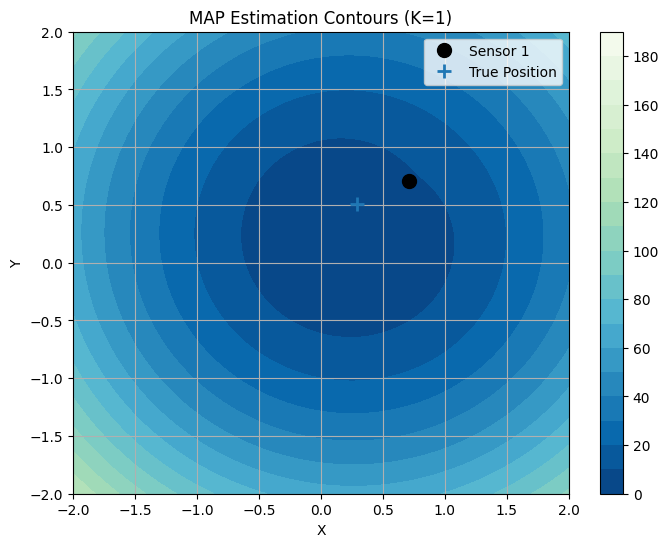

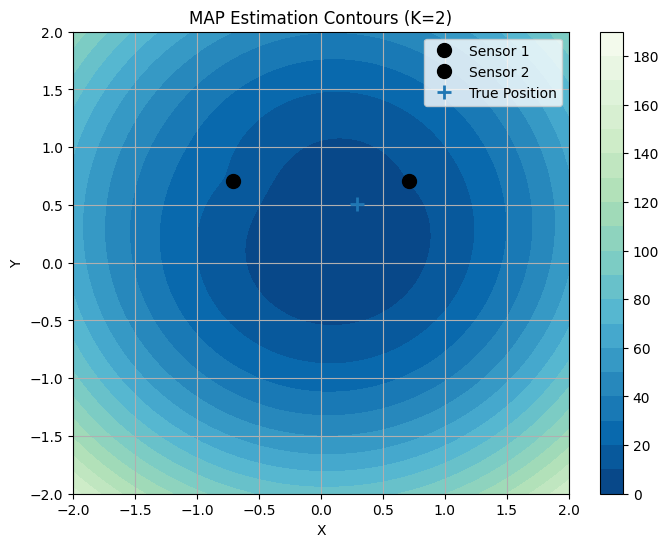

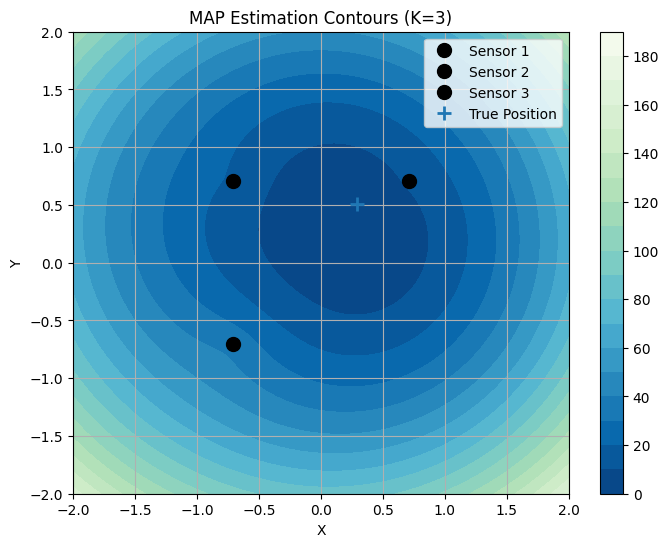

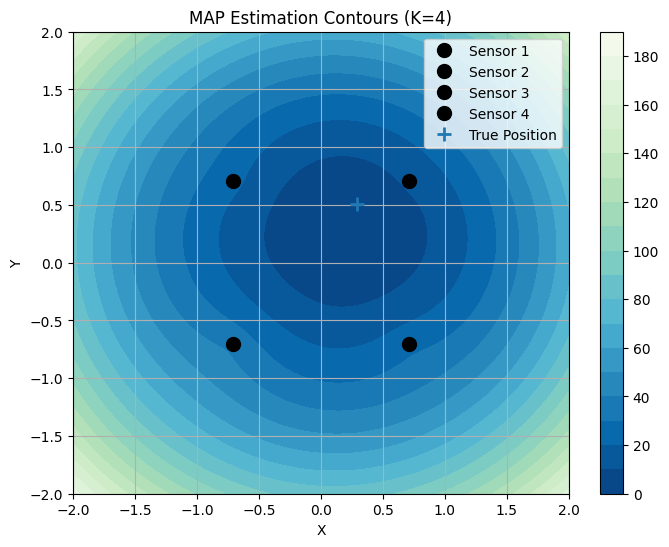

In [65]:
contour_levels = np.arange(0, 200, 10)


def generate_measurements(true_pos, landmarks, noise_std=sigma_i):
    distances = np.sqrt(
        (landmarks[:, 0] - true_pos[0]) ** 2 + (landmarks[:, 1] - true_pos[1]) ** 2
    )
    noisy_measurements = distances + np.random.normal(0, noise_std, len(distances))
    return noisy_measurements


def compute_map_objective_k(
    x,
    y,
    measurements,
    landmarks,
    k,
    sigma_meas=sigma_i,
    sigma_x=sigma_x,
    sigma_y=sigma_y,
):
    prior_term = (x**2) / (2 * sigma_x**2) + (y**2) / (2 * sigma_y**2)
    sensor_term = 0

    for i in range(k):
        di = np.sqrt((landmarks[i, 0] - x) ** 2 + (landmarks[i, 1] - y) ** 2)
        sensor_term += (np.square(measurements[i] - di)) / (2 * sigma_meas**2)

    return sensor_term + prior_term


def plot_map_estimation():
    true_pos = np.random.rand(2, 1)
    measurements = generate_measurements(true_pos, landmarks)

    x = np.linspace(-2, 2, 200)
    y = np.linspace(-2, 2, 200)
    X, Y = np.meshgrid(x, y)

    for k in range(1, 5):
        plt.figure(figsize=(8, 6))

        Z = np.zeros_like(X)
        for i in range(len(x)):
            for j in range(len(y)):
                Z[j, i] = compute_map_objective_k(
                    X[j, i], Y[j, i], measurements, landmarks, k
                )

        plt.contourf(X, Y, Z, levels=contour_levels, cmap="GnBu_r")

        for i in range(k):
            plt.plot(
                landmarks[i, 0],
                landmarks[i, 1],
                "ko",
                markersize=10,
                label=f"Sensor {i+1}",
            )

        plt.plot(
            true_pos[0], true_pos[1], "+", markersize=10, label="True Position", mew=2
        )

        plt.colorbar()
        plt.grid(True)
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.title(f"MAP Estimation Contours (K={k})")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.show()


# Run the plot function
plot_map_estimation()

The code calculates the value of the MAP objective function across a grid of points, aiming to estimate the most probable position of a true location based on noisy distance measurements from multiple landmarks. For each point on the grid, it balances two factors: the prior term and the range term. Lower MAP values on the contour plot indicate areas where the estimated position is likely closer to the true position. The function then visualizes these scores as contour plots, with each plot showing increasingly accurate estimates as more landmarks are considered. The true position is marked, and the contours indicate areas of high likelihood for the object's location.

It can be concluded that increasing the number of landmarks significantly enhances the localization accuracy of the vehicle. As more reference points are introduced, the contours converge around the true position of the car, indicating reduced uncertainty and increased confidence in the localization estimates. This demonstrates the effectiveness of the MAP estimation method in achieving precise vehicle localization through improved data aggregation.
